Histograma e Boxplot

<AxesSubplot:ylabel='Frequency'>

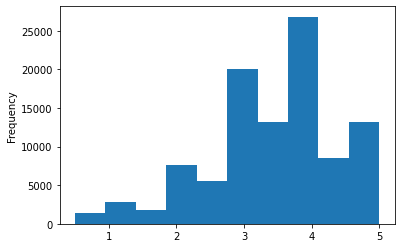

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Leitura do arquivo
notas = pd.read_csv("dados/ratings.csv")

#Muda os nomes da coluna
notas.columns = ["usuarioID", "filmeID", "nota", "momento"]

notas.nota.plot(kind='hist')


Analise exploratória

In [2]:
filmes = pd.read_csv("dados/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
